Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks
import math

Use Pandas library to read the data files as data frames.

Convert 3-axis Accelerometer data to 1-axis magnitude data
Using the magnitude data helps to make the algorithm work in any orientation of the phone.

In [2]:
data = pd.read_csv('/content/User2_pocket_10.csv').dropna()
data.head()

x = list(data['x'])
y = list(data['y'])
z = list(data['z'])

time = list(data['seconds_elapsed'])
total_time = time[len(time)-1]
print("Total time: ",total_time)

fs = len(time)/total_time
print("Sampling Frequency: ",fs)


mag = []
for i in range(len(x)):
  mag.append(math.sqrt(x[i]**2 + y[i]**2 + z[i]**2))

Total time:  9.316840087890624
Sampling Frequency:  61.930868680460044


Helper function for Normalizing data.
Normalization helps to set a constant threshold for all the users.

In [3]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
 

Helper function for bandpass filter


In [4]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y
    

Plotting signals to understand the data

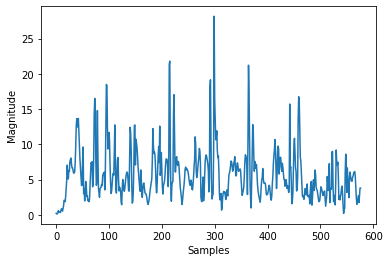

In [5]:
plt.plot(mag)
plt.xlabel('Samples')
plt.ylabel('Magnitude')
plt.show()

Human motion lies in the Frequency range of 0-2 Hz. I have used band pass filter to only consider these frequencies.

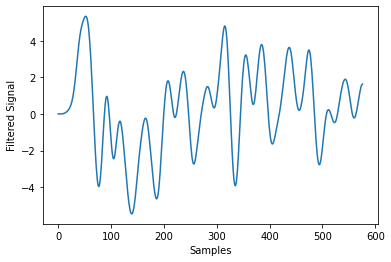

In [6]:
z_filtered = butter_bandpass_filter(mag,0.1,2,fs)
plt.plot(z_filtered)
plt.xlabel('Samples')
plt.ylabel('Filtered Signal')
plt.show()

Next, I normalize the data.

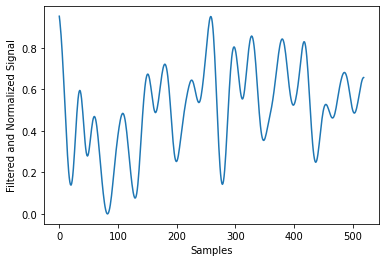

In [7]:
z_norm = NormalizeData(z_filtered)
z_norm = z_norm[int(len(z_norm)/10):]
plt.plot(z_norm)
plt.xlabel('Samples')
plt.ylabel('Filtered and Normalized Signal')
plt.show()

Find peaks in the signal. Peaks correspond to when a step was taken.
There are many peaks in the signal, we only take those peaks which have a prominent height (0.35) and lie at a distance of fs/4 apart from each other.
(See report for explanation of this)

13


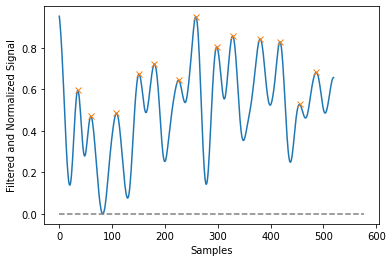

In [8]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

peaks, _ = find_peaks(z_norm, height = 0.35, distance = int(fs/4) -1)
print(len(peaks))

plt.plot(z_norm)
plt.plot(peaks, z_norm[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.xlabel('Samples')
plt.ylabel('Filtered and Normalized Signal')
plt.show()


Evaluation Plots

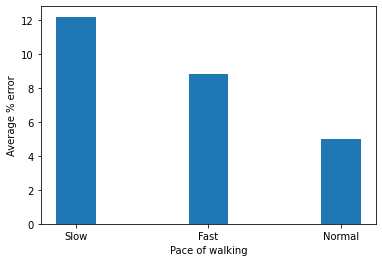

In [9]:
error = {'Slow':12.22, 'Fast':8.86, 'Normal':5}
pace = list(error.keys())
error = list(error.values())
  
# creating the bar plot
plt.bar(pace, error, width = 0.3)
 
plt.xlabel("Pace of walking")
plt.ylabel("Average % error")
plt.show()

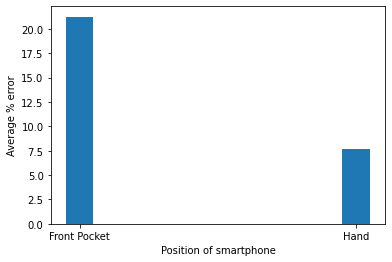

In [10]:
error = {'Front Pocket':21.25, 'Hand':7.66}
position = list(error.keys())
error = list(error.values())
  
# creating the bar plot
plt.bar(position, error, width = 0.1)
 
plt.xlabel("Position of smartphone")
plt.ylabel("Average % error")
plt.show()